In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading store's black friday sales csv file
sales_df = pd.read_csv("Black_Friday.csv", header = 0)
sales_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
497991,1004653,P00293342,M,36-45,12,B,3,1,8,NaN,NaN,5824
497992,1004654,P00108542,M,36-45,20,C,3,0,5,8.0,14.0,8580
497993,1004654,P00051442,M,36-45,20,C,3,0,8,17.0,NaN,9828
497994,1004654,P00272042,M,36-45,20,C,3,0,8,14.0,NaN,9977


# A. Data Cleaning

In [2]:
## Cleaning dataframe
def clean_df(df):
    
    #Converting columns to apropriate datatypes
    df[['User_ID', 'Product_ID', ]] = df[['User_ID', 'Product_ID']].astype(str)
    df[['Gender', 'City_Category', 'Marital_Status', 'Occupation']] = df[['Gender', 'City_Category', 'Marital_Status', 'Occupation']].astype('category')
    
    #Creating new column for age of integer type
    value_dict = {'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7}
    df['New_Age'] = df['Age'].map(value_dict)
    
    #Dropping the + sign and using the integers as is to represent no. of years stayed in current city
    df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.str.replace('+', '').astype(int)
    
    #Assuming null values in product category 2 and 3 as 0 products purchased for that record
    df.replace(np.nan, 0, inplace = True)
    return(df)

sales_df = clean_df(sales_df)
sales_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,1
4,1000002,P00285442,M,55+,16,C,4,0,8,0.0,0.0,7969,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497991,1004653,P00293342,M,36-45,12,B,3,1,8,0.0,0.0,5824,4
497992,1004654,P00108542,M,36-45,20,C,3,0,5,8.0,14.0,8580,4
497993,1004654,P00051442,M,36-45,20,C,3,0,8,17.0,0.0,9828,4
497994,1004654,P00272042,M,36-45,20,C,3,0,8,14.0,0.0,9977,4


# B. Data Analysis

Comparing number of customers, and total amount of purchase for each gender.

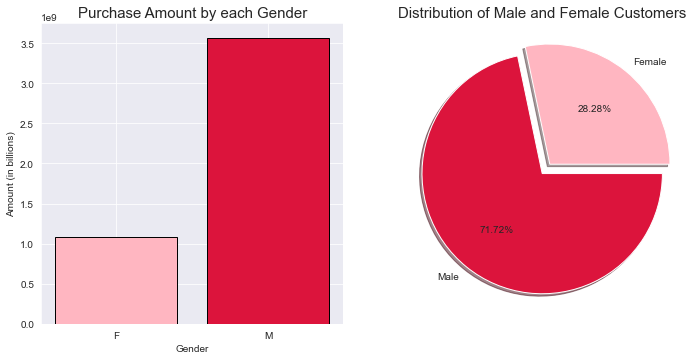

In [3]:
female_customers = sales_df[sales_df['Gender'] == 'F']['User_ID'].nunique()
male_customers = sales_df[sales_df['Gender'] == 'M']['User_ID'].nunique()

sales_gender_df = sales_df.groupby(['Gender']).sum()[['Purchase']]
sales_gender_df['Customer_Count'] = [female_customers, male_customers]

sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
plt.tight_layout(pad = 2)

ax[0].bar(sales_gender_df.index, sales_gender_df['Purchase'], color = ['lightpink', 'crimson'], edgecolor = 'black')
ax[0].set_title("Purchase Amount by each Gender", fontsize = 15)
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Amount (in billions)")

ax[1].pie(sales_gender_df['Customer_Count'], labels = ['Female', 'Male'], colors = ['lightpink', 'crimson'], explode = [0.1, 0], autopct='%1.2f%%', shadow = True)
ax[1].set_title("Distribution of Male and Female Customers", fontsize = 15);

From the above charts we can say that the dataset is not balanced. Males form almost 3/4th of the total customers. Moreover, they have spent more than 3 times than their female counterparts.

Comparing total amount of purchase for different cities.

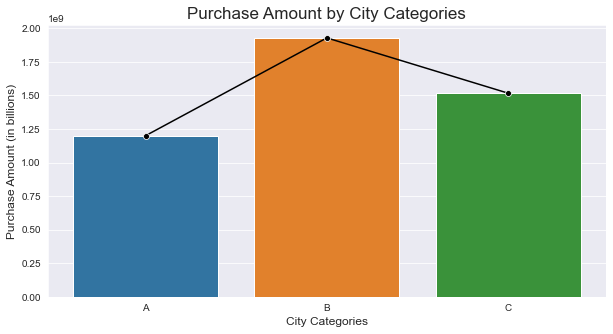

In [4]:
city_order = sales_df.groupby(['City_Category']).sum()[['Purchase']].reset_index()
plt.figure(figsize = (10, 5))
ax1 = sns.barplot(x = 'City_Category', y = 'Purchase', data = city_order, estimator = sum)
ax1 = sns.lineplot(x = 'City_Category', y = 'Purchase', data = city_order, estimator = sum, marker = 'o', color = 'black')
ax1.set_title("Purchase Amount by City Categories", fontsize = 17)
ax1.set_xlabel("City Categories", fontsize = 12)
ax1.set_ylabel("Purchase Amount (in billions)", fontsize = 12);

From the above chart we can say that cities in category B have spent the most money on black friday sale with cities in category C in the 2nd place and category A spending the least out of the three categories.

Comparing total amount of purchase for combinations of gender and age.

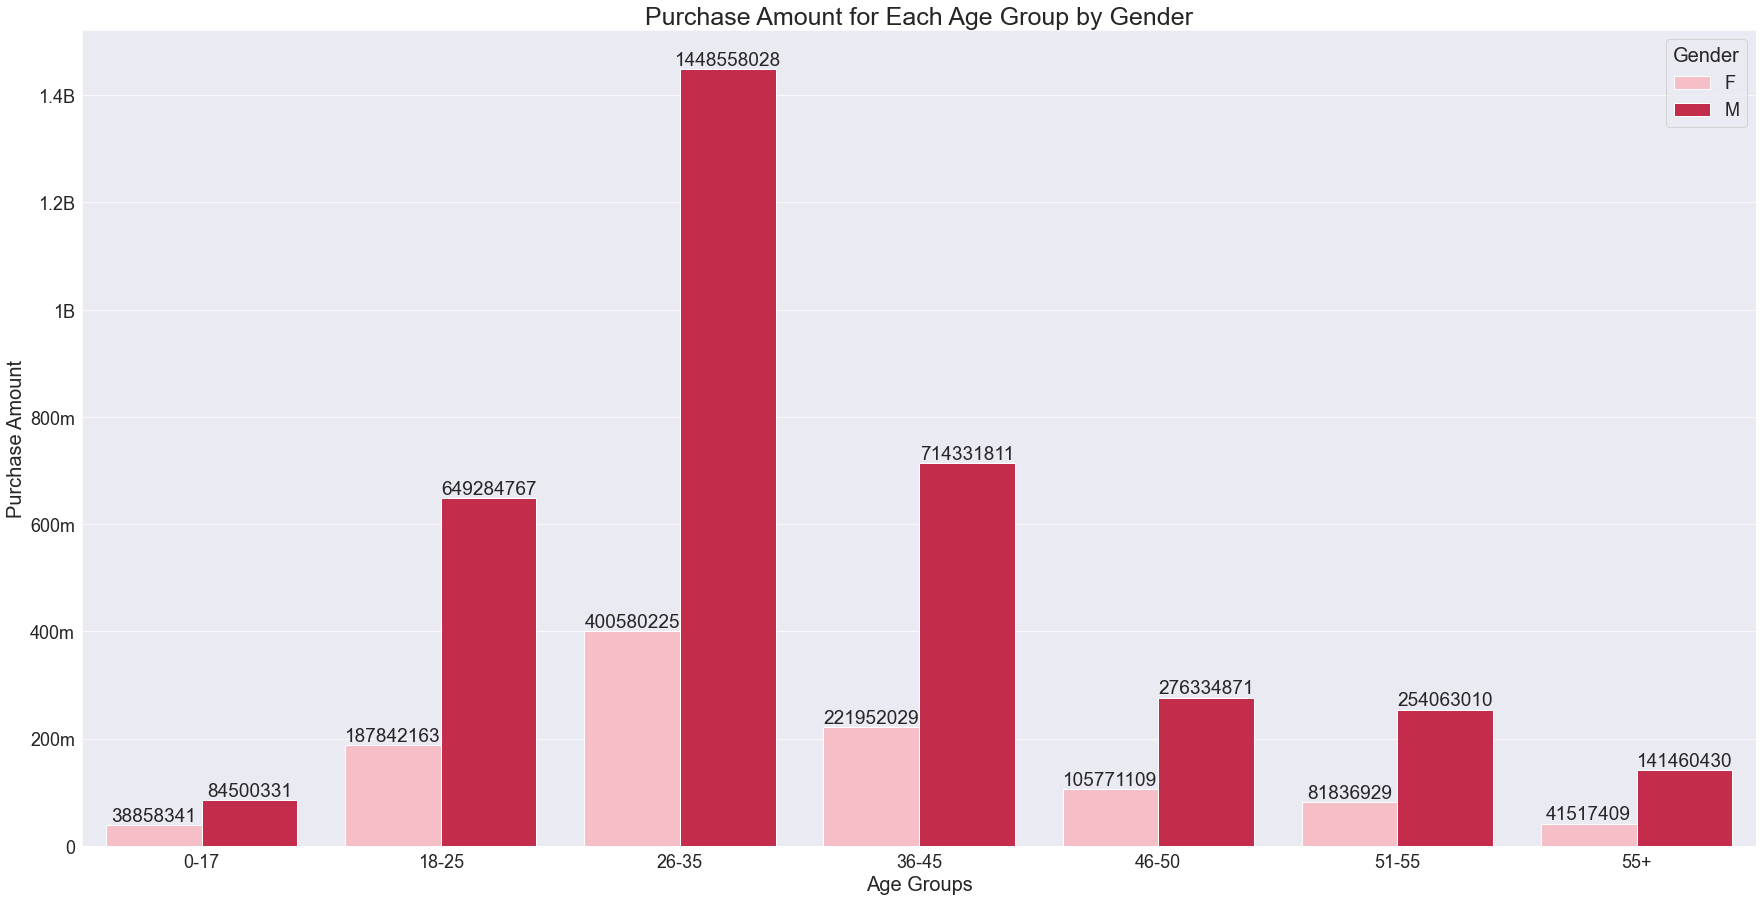

In [5]:
gender_age_sales = sales_df.groupby(['Age', 'Gender']).sum()[['Purchase']].reset_index()
plt.figure(figsize = (30, 15))
ax2 = sns.barplot(x = 'Age', y = 'Purchase', data = gender_age_sales, estimator = sum, hue = 'Gender', 
                  palette = ['lightpink', 'crimson'])

ax2.set_title("Purchase Amount for Each Age Group by Gender", fontsize = 25)
ax2.set_xlabel("Age Groups", fontsize = 20)
ax2.set_ylabel("Purchase Amount", fontsize = 20)
ax2.set_xticklabels(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], size = 18)
ax2.set_yticklabels(['0', '200m', '400m', '600m', '800m', '1B', '1.2B', '1.4B'], size = 18)
ax2.legend(title = 'Gender', title_fontsize = 20, fontsize = 18)

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                   fontsize = 19, xytext = (0, 9), textcoords = 'offset points')

The males have been consistently spending more than females across all age groups. Males across the combined age group of 18-45 should be the target for the marketing campaign.

Comparing distribution of purchase amounts among combinations of genders and age.

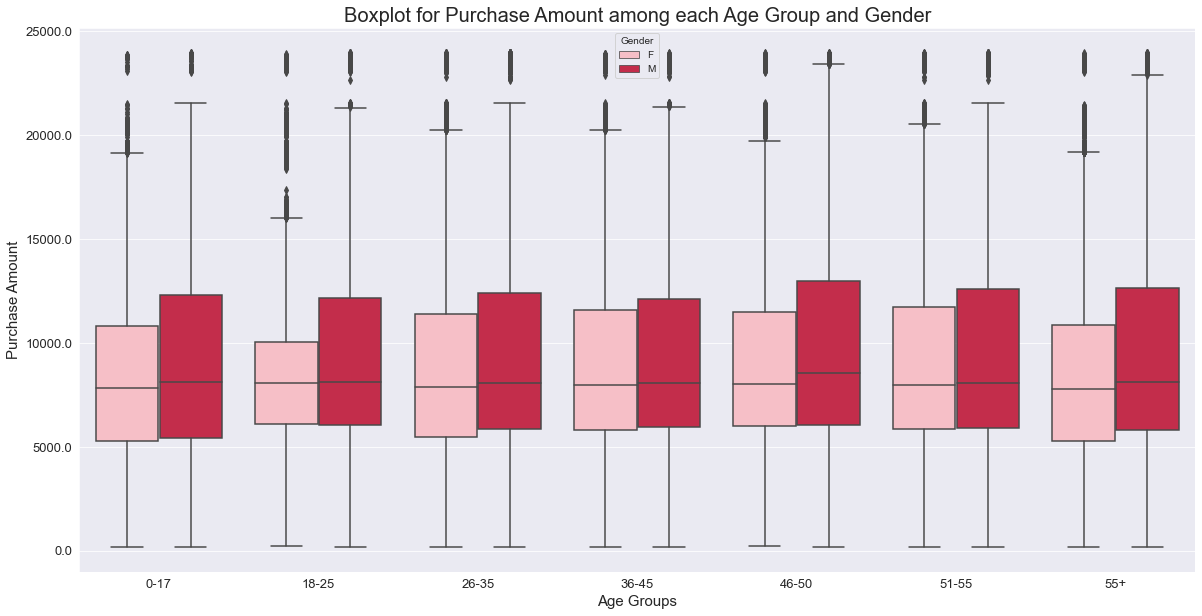

In [6]:
plt.figure(figsize = (20, 10))
ax3 = sns.boxplot(x = 'Age', y = 'Purchase', data = sales_df, hue = 'Gender', palette = ['lightpink', 'crimson'])
ax3.set_title("Boxplot for Purchase Amount among each Age Group and Gender", fontsize = 20)
ax3.set_xlabel("Age Groups", fontsize = 15)
ax3.set_ylabel("Purchase Amount", fontsize = 15)
ax3.set_xticklabels(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], size = 13)
ax3.set_yticklabels(ax3.get_yticks(), size = 13);

From the above chart, we can say that the medians across all age groups and gender more or less overlap. Also, the variability in males is consistent and more than females. Females have large outliers across all age groups.

Comparing distribution of purchase amounts among different occupations.

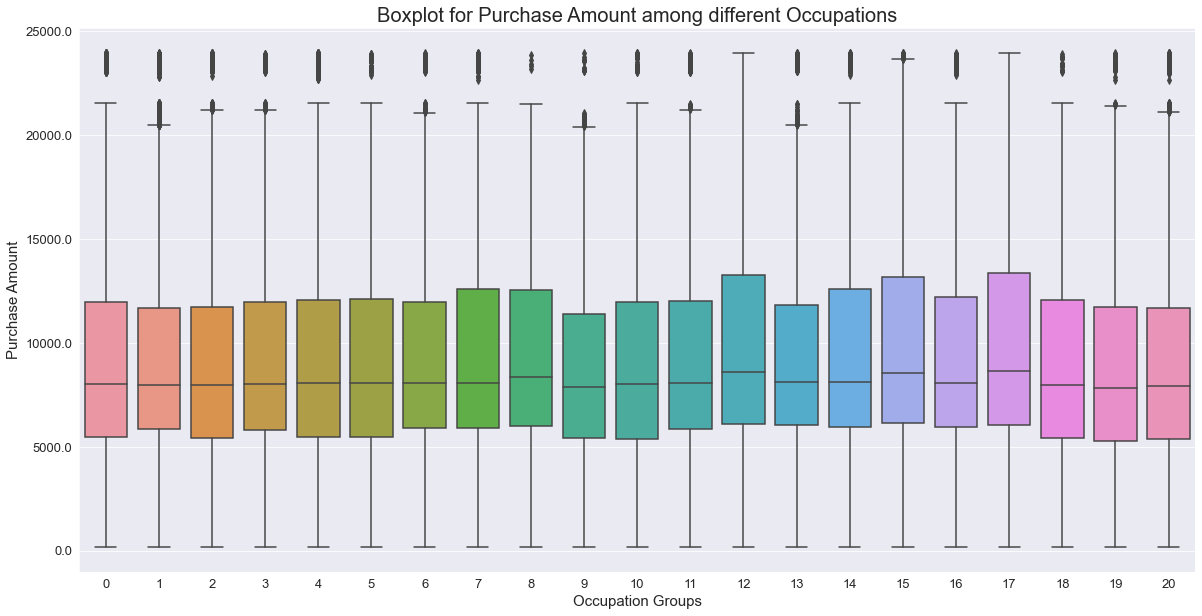

In [7]:
plt.figure(figsize = (20, 10))
ax4 = sns.boxplot(x = 'Occupation', y = 'Purchase', data = sales_df)
ax4.set_title("Boxplot for Purchase Amount among different Occupations", fontsize = 20)
ax4.set_xlabel("Occupation Groups", fontsize = 15)
ax4.set_ylabel("Purchase Amount", fontsize = 15)
ax4.set_xticklabels(ax4.get_xticks(), size = 13)
ax4.set_yticklabels(ax4.get_yticks(), size = 13);

Medians across most of the occupation groups are the same. Maximum amount is spent by group 12 and 17.

Creating a heatmap showing correlation matrix of all of two numerical features.

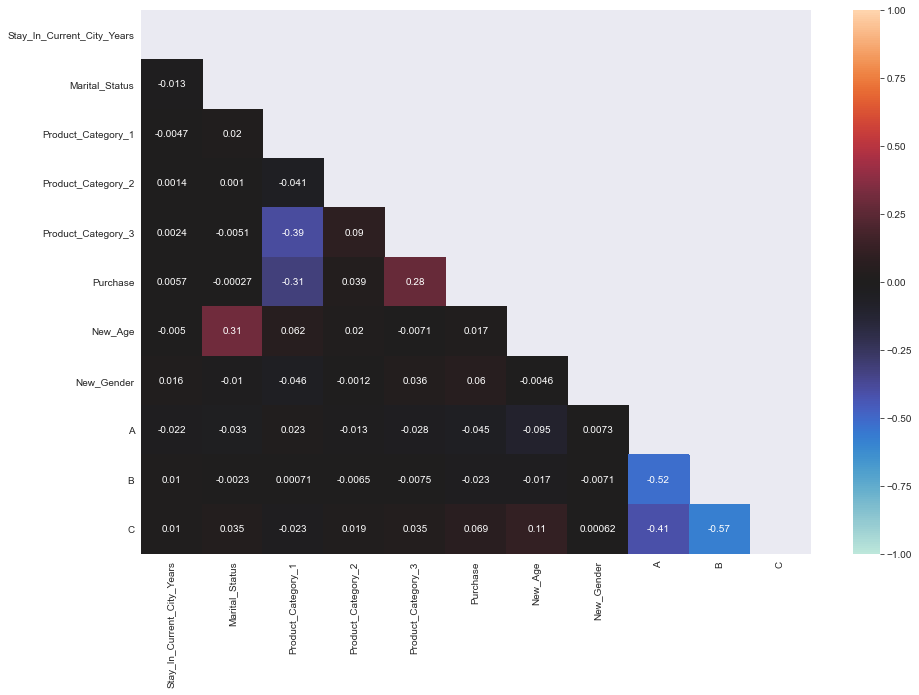

In [8]:
corr_df = sales_df[['Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase', 'New_Age']]

gender_dict = {'F':0, 'M':1}
corr_df['New_Gender'] = sales_df['Gender'].map(gender_dict).astype(int)

corr_df['Marital_Status'] = corr_df.Marital_Status.astype(int)

city_dummy_df = pd.get_dummies(sales_df['City_Category'])

corr_df = pd.concat([corr_df, city_dummy_df], axis = 1)

plt.figure(figsize = (15, 10))
mask = np.triu(corr_df.corr())
sns.heatmap(corr_df.corr(), annot = True, vmin = -1, vmax = 1, center= 0, mask = mask);

The above heatmap suggests that only Product_Category_3 is positively correlated with purchase amount (0.28) which is still low.

# C. Data Modelling

In [9]:
#We decided to group the data to get the average of numerical features for each user_id.
def grp_by(df):
    df = df.groupby(['User_ID', 'Gender', 'Occupation', 'City_Category', 'Marital_Status']).mean().dropna().reset_index()
    
    df['Gender'] = np.where(df['Gender'] == 'F', 0, 1)
    
    df['Marital_Status'] = df['Marital_Status'].astype(int)
    return(df)

mydf = grp_by(sales_df)
mydf

,User_ID,Gender,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
0,1000001,0,10,A,0,2.0,5.757576,3.878788,4.121212,9857.303030,1.0
1,1000002,1,16,C,0,4.0,4.295775,7.338028,4.690141,10454.478873,7.0
2,1000003,1,15,A,0,3.0,3.285714,4.107143,5.285714,11500.142857,3.0
3,1000004,1,7,B,1,2.0,1.000000,8.500000,10.583333,15583.250000,5.0
4,1000005,1,20,A,1,1.0,5.926316,6.105263,2.178947,7707.200000,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5886,1006036,0,15,B,1,4.0,6.134884,6.602326,2.965116,7924.690698,3.0
5887,1006037,0,1,C,0,4.0,7.623853,7.321101,3.935780,9197.366972,5.0
5888,1006038,0,1,C,0,2.0,5.714286,9.000000,7.285714,8706.714286,7.0
5889,1006039,0,0,B,1,4.0,5.701493,7.791045,4.268657,8276.179104,5.0


In [10]:
#One hot encoding of categorical features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def onehot_encode_df(df):
    lab_enc = LabelEncoder()
    df['New_City'] = lab_enc.fit_transform(df['City_Category'])

    enc = OneHotEncoder(handle_unknown = 'ignore', sparse = True)

    enc_df = pd.DataFrame(enc.fit_transform(df[['Occupation', 'New_City']]).toarray())

    df = df.join(enc_df)
    df = df.drop(['User_ID', 'Occupation', 'City_Category', 'New_City'], axis = 1)
    return(df)

mydf = onehot_encode_df(mydf)
mydf

,Gender,Marital_Status,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age,0,1,...,14,15,16,17,18,19,20,21,22,23
0,0,0,2.0,5.757576,3.878788,4.121212,9857.303030,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,4.0,4.295775,7.338028,4.690141,10454.478873,7.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,3.0,3.285714,4.107143,5.285714,11500.142857,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,2.0,1.000000,8.500000,10.583333,15583.250000,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,1.0,5.926316,6.105263,2.178947,7707.200000,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,0,1,4.0,6.134884,6.602326,2.965116,7924.690698,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5887,0,0,4.0,7.623853,7.321101,3.935780,9197.366972,5.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5888,0,0,2.0,5.714286,9.000000,7.285714,8706.714286,7.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5889,0,1,4.0,5.701493,7.791045,4.268657,8276.179104,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# D. Regression

In [11]:
#Splitting data into train (80%) and test (20%) data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mydf.drop('Purchase', axis = 1), mydf['Purchase'], test_size = 0.2, random_state = 0)

In [12]:
#Creation of linear regression model, training and testing the trained model over test data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:
#Calculating performance of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Coefficients: {}'.format(model.coef_))
print('Intercept: {}'.format(model.intercept_))
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error (MSE): {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Coefficient of determination (R^2): {:.2f}'.format(r2_score(y_test, y_pred)))

Coefficients: [ 4.20462511e+02 -4.27119798e+01  2.09644238e+01 -3.03857223e+02
  1.08386320e+02  3.81781319e+02  8.34362399e+01 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
  1.69976349e+15  1.69976349e+15  1.69976349e+15]
Intercept: -1445219331843552.5
Mean squared error (MSE): 2367073.18
Mean absolute error (MSE): 1181.80
Coefficient of determination (R^2): 0.35


In [14]:
#Loading unseen data of black friday sales
final_test_df = pd.read_csv("Black_Friday_Final_Test.csv", header = 0)
final_test_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004655,P00031042,F,26-35,1,A,3,0,8,NaN,NaN,10006
1,1004655,P00303042,F,26-35,1,A,3,0,5,NaN,NaN,5152
2,1004655,P00085442,F,26-35,1,A,3,0,12,14.0,NaN,1430
3,1004655,P00058142,F,26-35,1,A,3,0,3,4.0,12.0,11063
4,1004655,P00316742,F,26-35,1,A,3,0,4,5.0,NaN,2070
...,...,...,...,...,...,...,...,...,...,...,...,...
39576,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
39577,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
39578,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
39579,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [15]:
#Cleaning the dataframe
final_test_df = clean_df(final_test_df)
final_test_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
0,1004655,P00031042,F,26-35,1,A,3,0,8,0.0,0.0,10006,3
1,1004655,P00303042,F,26-35,1,A,3,0,5,0.0,0.0,5152,3
2,1004655,P00085442,F,26-35,1,A,3,0,12,14.0,0.0,1430,3
3,1004655,P00058142,F,26-35,1,A,3,0,3,4.0,12.0,11063,3
4,1004655,P00316742,F,26-35,1,A,3,0,4,5.0,0.0,2070,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39576,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,0.0,11664,4
39577,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196,4
39578,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,0.0,8043,4
39579,1004737,P00285842,M,36-45,16,C,1,0,5,0.0,0.0,7172,4


In [16]:
#Grouping the dataframe to the average of the numerical features to get one record per person
final_df = grp_by(final_test_df)
final_df

,User_ID,Gender,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
0,1000001,0,10,A,0,2.0,3.000000,4.000000,12.000000,8190.000000,1.0
1,1000002,1,16,C,0,4.0,5.800000,3.600000,5.200000,13617.000000,7.0
2,1000003,1,15,A,0,3.0,1.000000,2.000000,0.000000,19631.000000,3.0
3,1000004,1,7,B,1,2.0,1.000000,0.000000,0.000000,18988.000000,5.0
4,1000005,1,20,A,1,1.0,8.727273,5.636364,0.000000,8074.272727,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5340,1006035,0,1,C,0,3.0,5.357143,6.642857,3.142857,7010.357143,3.0
5341,1006036,0,15,B,1,4.0,6.260870,7.108696,2.260870,9001.065217,3.0
5342,1006037,0,1,C,0,4.0,7.857143,5.571429,2.000000,10360.571429,5.0
5343,1006038,0,1,C,0,2.0,6.000000,10.000000,0.000000,6637.333333,7.0


In [17]:
#One Hot Encoding the dataframe
final_df = onehot_encode_df(final_df)
final_df

,Gender,Marital_Status,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age,0,1,...,14,15,16,17,18,19,20,21,22,23
0,0,0,2.0,3.000000,4.000000,12.000000,8190.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,4.0,5.800000,3.600000,5.200000,13617.000000,7.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,3.0,1.000000,2.000000,0.000000,19631.000000,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,2.0,1.000000,0.000000,0.000000,18988.000000,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,1.0,8.727273,5.636364,0.000000,8074.272727,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5340,0,0,3.0,5.357143,6.642857,3.142857,7010.357143,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5341,0,1,4.0,6.260870,7.108696,2.260870,9001.065217,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5342,0,0,4.0,7.857143,5.571429,2.000000,10360.571429,5.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5343,0,0,2.0,6.000000,10.000000,0.000000,6637.333333,7.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
#Predicting purchase amount in unseen data
X_final = final_df.loc[:, final_df.columns != 'Purchase']
y_final = final_df.loc[:, final_df.columns == 'Purchase']

y_pred_final = model.predict(X_final)

In [19]:
#Performance on unseen data
print('Coefficients: {}'.format(model.coef_))
print('Intercept: {}'.format(model.intercept_))
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_final, y_pred_final)))
print('Mean absolute error (MSE): {:.2f}'.format(mean_absolute_error(y_final, y_pred_final)))
print('Coefficient of determination (R^2): {:.2f}'.format(r2_score(y_final, y_pred_final)))

Coefficients: [ 4.20462511e+02 -4.27119798e+01  2.09644238e+01 -3.03857223e+02
  1.08386320e+02  3.81781319e+02  8.34362399e+01 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14 -2.54544158e+14
  1.69976349e+15  1.69976349e+15  1.69976349e+15]
Intercept: -1445219331843552.5
Mean squared error (MSE): 9569283.88
Mean absolute error (MSE): 2241.71
Coefficient of determination (R^2): 0.14
